In [1]:
import os

from main import load_datasets
from evaluate_model import evaluate_model

/scratch/users/k21193529/conda/jenv3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Data

In [2]:
root = '../data_2023_06_02'

fever_dir = os.path.join(root, 'preprocessed/FEVER')
pubhealth_dir = os.path.join(root, 'preprocessed/PUBHEALTH')
climate_dir = os.path.join(root, 'preprocessed/CLIMATE-FEVER')

In [3]:
_, _, _, ds_test = load_datasets(fever_dir, pubhealth_dir, climate_dir)

## Evaluate Model

#### Load experiment settings

In [4]:
import yaml

In [5]:
with open('best_models_v3.yaml', 'r') as file:
    config = yaml.safe_load(file)

#unwind config
experiments = [
    {"model": model, "train dataset": test_set, "best_model_path": path} 
    for model, d1 in config.items() 
    for test_set, path in d1.items()
]

#### Run models

In [ ]:
# Run single experiment
# results = evaluate_model(model_checkpoint, ds_test, metric="accuracy")

In [6]:
# Run all experiments
all_results = []
for experiment in experiments:
    model_path = experiment['best_model_path']
    results = evaluate_model(model_path, ds_test, metric="accuracy")
    for test_dataset, r in results.items():
        entry = experiment.copy()
        entry['test_dataset'] = test_dataset
        entry['accuracy'] = r['accuracy']
        all_results.append(entry)

print(len(all_results))

Model loaded into cuda
Tokenizing dataset


Evaluating fever
Evaluating pubhealth
Evaluating climate
Model loaded into cuda
Tokenizing dataset


Evaluating fever
Evaluating pubhealth
Evaluating climate
Model loaded into cuda
Tokenizing dataset


Evaluating fever
Evaluating pubhealth
Evaluating climate
Model loaded into cuda
Tokenizing dataset


Evaluating fever
Evaluating pubhealth
Evaluating climate
Model loaded into cuda
Tokenizing dataset


Evaluating fever
Evaluating pubhealth
Evaluating climate
Model loaded into cuda
Tokenizing dataset


Evaluating fever
Evaluating pubhealth
Evaluating climate
Model loaded into cuda
Tokenizing dataset


Evaluating fever
Evaluating pubhealth
Evaluating climate
Model loaded into cuda
Tokenizing dataset


Evaluating fever
Evaluating pubhealth
Evaluating climate
Model loaded into cuda
Tokenizing dataset


Evaluating fever
Evaluating pubhealth
Evaluating climate
Model loaded into cuda
Tokenizing dataset


Evaluating fever
Evaluating pubhealth
Evaluating climate
Model loaded into cuda
Tokenizing dataset


Evaluating fever
Evaluating pubhealth
Evaluating climate
Model loaded into cuda
Tokenizing dataset


Evaluating fever
Evaluating pubhealth
Evaluating climate
Model loaded into cuda
Tokenizing dataset


Evaluating fever
Evaluating pubhealth
Evaluating climate
Model loaded into cuda
Tokenizing dataset


Evaluating fever
Evaluating pubhealth
Evaluating climate
Model loaded into cuda
Tokenizing dataset


Evaluating fever
Evaluating pubhealth
Evaluating climate
45


#### Present results

In [8]:
import pandas as pd

In [9]:
df = pd.DataFrame(all_results)

In [10]:
df['train dataset'].replace({
    'FEVER': 'Fine-tuned on FEVER',
    'PUBHEALTH': 'Fine-tuned on PUBHEALTH',
    'CLIMATE-FEVER': 'Fine-tuned on CLIMATE-FEVER'
}, inplace=True)

df['test_dataset'].replace({
    'fever': 'FEVER',
    'pubhealth': 'PUBHEALTH',
    'climate': 'CLIMATE-FEVER'
}, inplace=True)

In [11]:
df.to_csv('results_v3.csv')

#### Plot graph

In [12]:
import seaborn as sns
import pandas as pd

In [13]:
df = pd.read_csv('results_v3.csv', index_col=0)

In [14]:
df['accuracy'] = df['accuracy']*100

In [15]:
sns.set_theme(style="ticks", font_scale=1.5)
sns.set_style("ticks", { 'axes.grid': True })

/scratch/users/k21193529/conda/jenv3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


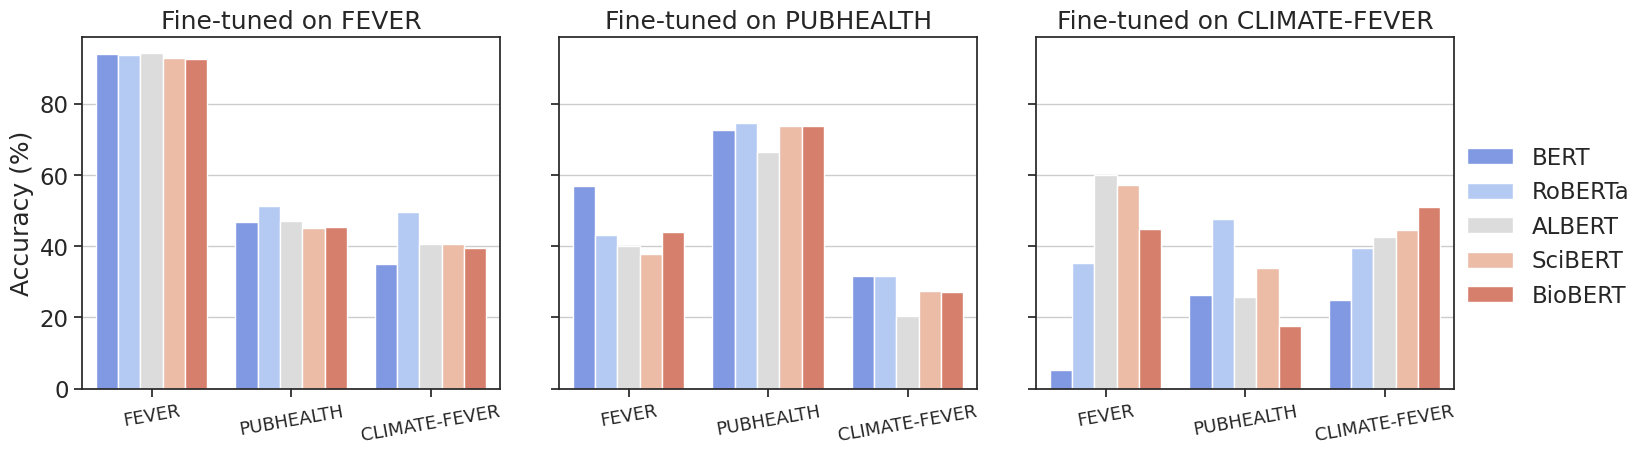

In [16]:
sea = sns.FacetGrid(
    df, col='train dataset', 
    height=5, aspect=1, despine=False,
)

sea.map_dataframe(
    sns.barplot, data=df, x="test_dataset", y="accuracy", 
    hue="model", errorbar=None,
    palette="coolwarm",
)

sea.add_legend()
sea.set_titles(col_template="{col_name}")
sea.set_xlabels("")
sea.set_ylabels('Accuracy (%)')
sea.set_xticklabels(rotation=10, fontsize=13)

In [17]:
sea.figure.savefig("overall_results_v3.png")